# Iris dataset

In [1]:
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read data
iris = datasets.load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = iris.target

# Shuffle the data
df = df.sample(frac=1, random_state=0)

# Extract X and y
X = df.iloc[:, 0:4].values
y = df["target"].values

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)
# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [3]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(4,)),
    tf.keras.layers.Dense(units=16, activation='sigmoid', name='hidden1'),
    tf.keras.layers.Dense(units=3, name='output', activation='softmax')
    ])

model.summary()

adam = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 16)                80        
                                                                 
 output (Dense)              (None, 3)                 51        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-03-01 15:15:03.865952: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-03-01 15:15:03.865972: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-01 15:15:03.865982: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-01 15:15:03.866010: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-01 15:15:03.866024: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
tf_fit = model.fit(x=X_train_std, y=y_train,
        batch_size=16,
        validation_split=0.2,
        epochs=400, 
        verbose=1)

Epoch 1/400


2024-03-01 15:15:04.113419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - ETA: 0s - loss: 1.2241 - accuracy: 0.3095

2024-03-01 15:15:05.525552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 2s 133ms/step - loss: 1.2241 - accuracy: 0.3095 - val_loss: 1.1425 - val_accuracy: 0.4286
Epoch 2/400
6/6 [==============================] - 0s 21ms/step - loss: 1.1996 - accuracy: 0.3095 - val_loss: 1.1276 - val_accuracy: 0.4286
Epoch 3/400
6/6 [==============================] - 0s 12ms/step - loss: 1.1759 - accuracy: 0.3095 - val_loss: 1.1143 - val_accuracy: 0.4286
Epoch 4/400
6/6 [==============================] - 0s 18ms/step - loss: 1.1555 - accuracy: 0.3095 - val_loss: 1.1022 - val_accuracy: 0.4286
Epoch 5/400
6/6 [==============================] - 0s 9ms/step - loss: 1.1366 - accuracy: 0.3095 - val_loss: 1.0898 - val_accuracy: 0.4286
Epoch 6/400
6/6 [==============================] - 0s 10ms/step - loss: 1.1194 - accuracy: 0.3095 - val_loss: 1.0770 - val_accuracy: 0.4286
Epoch 7/400
6/6 [==============================] - 0s 9ms/step - loss: 1.1019 - accuracy: 0.3333 - val_loss: 1.0643 - val_accuracy: 0.4286
Epoch 8/400
6/6 [================

In [5]:
# Inspect the training history
df = pd.DataFrame(tf_fit.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.224100,0.309524,1.142493,0.428571
1,1.199583,0.309524,1.127634,0.428571
2,1.175909,0.309524,1.114253,0.428571
3,1.155531,0.309524,1.102225,0.428571
4,1.136619,0.309524,1.089849,0.428571


<Axes: title={'center': 'Loss'}, xlabel='Epoch', ylabel='Loss'>

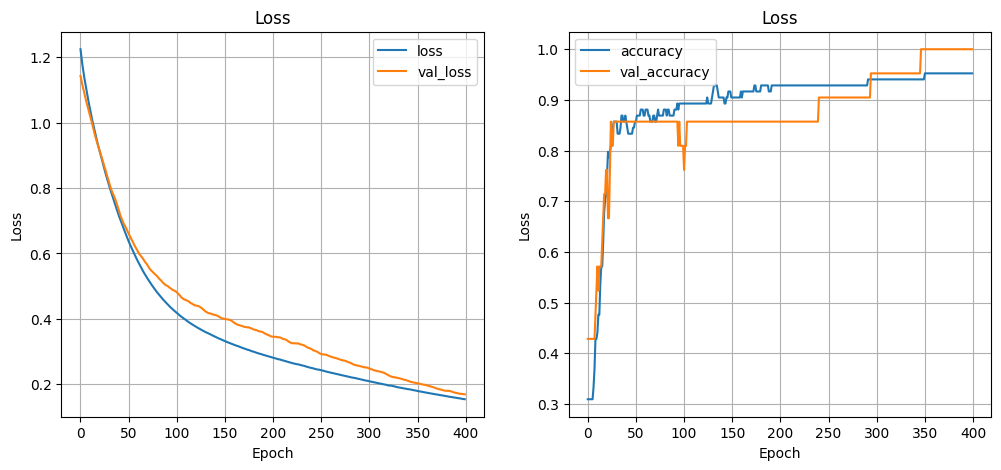

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

df[["loss", "val_loss"]].plot(
    ax=axes[0], title="Loss", grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)

df[["accuracy", "val_accuracy"]].plot(
    ax=axes[1], title="Loss", grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)

In [7]:
results = model.evaluate(X_test_std, y_test, verbose=0)
print(f'Test loss: {results[0]:.4f}   Test Acc.: {results[1]:.4f}')

Test loss: 0.1417   Test Acc.: 0.9333
